In [1]:
 %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =[20.0 ,10.0]
from mpl_toolkits.mplot3d import Axes3D



In [2]:
data=pd.read_csv('C:/Users/hrashikesh hegde/Downloads/student.csv')
print(data.shape)


(1000, 3)


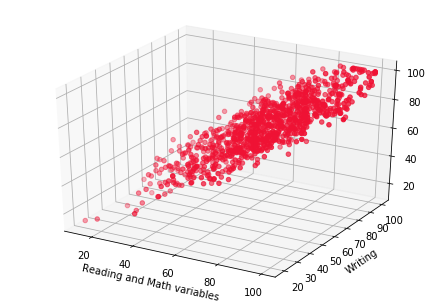

In [3]:
math =data['Math'].values
read=data['Reading'].values
write=data['Writing'].values

#plottig the score as scatter plot
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(math,read,write, color='#ef1234')

plt.xlabel('Reading and Math variables')
plt.ylabel('Writing')
plt.show()

In [4]:
m=len(math)
x0=np.ones(m)
X=np.array([x0,math,read]).T
#initial coeffiecient
B=np.array([0,0,0])
Y=np.array(write)
alpha=0.0001

In [5]:
def cost_function(X,Y,B):
    m=len(Y)
    J=np.sum((X.dot(B)-Y)**2)/(2*m)
    return J

In [6]:
inital_cost=cost_function(X,Y,B)
print(inital_cost)

2470.11


In [7]:
def gradient_descent(X,Y,B,alpha,iterations):
    cost_history=[0]*iterations
    cost_history=[0]*iterations
    m=len(Y)
    
    for i in range(iterations):
        h=X.dot(B)
        loss=h-Y
        gradient =X.T.dot(loss)/m
        B=B-alpha*gradient
        cost=cost_function(X,Y,B)
        cost_history[i]=cost
        
        
    return B,cost_history

In [8]:
newB,cost_history=gradient_descent(X,Y,B,alpha,100000)
print(newB)
print(min(cost_history))

[-0.47889172  0.09137252  0.90144884]
10.475123473539167


In [9]:
def rmse(Y,Y_pred):
    rmse=np.sqrt(sum((Y-Y_pred)**2)/len(Y))
    return rmse
def r2_score(Y,Y_pred):
    mean_Y=np.mean(Y)
    ss_tot=sum((Y-mean_Y)**2)
    ss_res=sum((Y-Y_pred)**2)
    r2=1-(ss_res/ss_tot)
    return r2
Y_pred=X.dot(newB)
print(rmse(Y,Y_pred))
print(r2_score(Y,Y_pred))

4.577143972727789
0.9097223273061553


In [11]:
### using sikit/ machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X=X.resize(m,1)
# creating model
reg =LinearRegression()
#fitting training data
reg= reg.fit(X, Y)
#Y_pred =reg.predict(X)
Y_pred =reg.predict(X)

#calculating RMSE and r2 score
rmse = mean_squared_error(Y.Y_pred)
rmse = np.sqrt(mse)
r2_score =reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

ValueError: cannot resize this array: it does not own its data

In [12]:
### using sikit/ machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=np.array([math,read]).T
Y=np.array(write)

#Model Initailazation
reg=LinearRegression()
reg=reg.fit(X,Y)
Y_pred =reg.predict(X)

rms=np.sqrt(mean_squared-error(Y,Y_pred))
r2=reg.score(X,Y)
print(rmse)
print(r2)

NameError: name 'mean_squared' is not defined

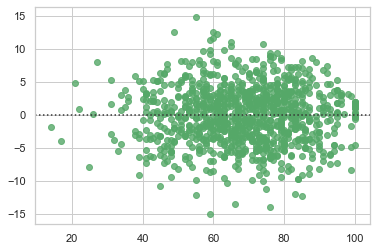

In [13]:
import seaborn as sb
sb.set(style="whitegrid")
sb.residplot(Y,Y_pred,color="g")

In [14]:
#Regression Assumption


In [15]:
import statsmodels.api as sm
regressor_OLS=sm.OLS(endog=Y,exog=X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.169e+05
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        15:35:32   Log-Likelihood:                         -2941.1
No. Observations:                1000   AIC:                                      5886.
Df Residuals:                     998   BIC:                                      5896.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0891      0.016      5.601      0.000       0.058       0.120
x2             0.8970      0.015     58.370      0.000       0.867       0.927
==============================================================================
Omnibus:                        0.601   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.474
Skew:                          -0.011   Prob(JB):                        0.789
Kurtosis:                       3.104   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#DDurbin-Watson if your values less than two than n0 auto co relation


In [17]:
#Jarque-Bera (JB) goodness of fit test

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant
 
data =pd.read_csv('C:/Users/hrashikesh hegde/Downloads/student.csv')
df=pd.DataFrame(data)
X=add_constant(df)

D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
pd.Series([variance_inflation_factor(X.values,i)
            for i in range(X.shape[1])],
           index=X.columns)

const      24.937662
Math        2.960544
Reading    11.368520
Writing    11.097569
dtype: float64

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
